# Research Results and Discussion

In [9]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Define problem parameters
num_qubits = 1
num_layers = 5

num_training_points = 30  # Increase the number of training points
training_inputs = np.linspace(0, 3*np.pi, num_training_points)  # Use np.linspace for even distribution
training_data = [(x, np.sin(x)) for x in training_inputs]


# Initialize quantum device and optimizer
dev = qml.device("default.qubit", wires=num_qubits)
params = np.random.rand(num_layers)
learning_rate = 0.01  # Reduced learning rate
opt = qml.AdamOptimizer(learning_rate)
# Define the circuit with two RY gates
@qml.qnode(dev)
def circuit(params, x):
    qml.RY(params[0] * x, wires=0)
    qml.RY(params[1] * x, wires=0)
    qml.RY(params[2] * x, wires=0)
    qml.RY(params[3] * x, wires=0)
    qml.RY(params[4] * x, wires=0)
    return qml.expval(qml.PauliZ(wires=0))

# Define the mean squared error cost function
def cost(params, x, target):
    predicted_output = circuit(params, x)
    return ((predicted_output - target) ** 2)

# Train the circuit using gradient descent
print("Training the circuit...")
for iteration in range(200):
    for x, target in training_data:
        params = opt.step(cost, params, x=x, target=target)

    if iteration % 10 == 0:
        print(f"Iteration {iteration}:")
        for x, target in training_data:
            predicted_output = circuit(params, x)
            error = np.abs(predicted_output - target)
            print(f"Input: {x}, Expected: {target:.4f}, Predicted: {predicted_output:.4f}, Error: {error:.4f}")

Training the circuit...
Iteration 0:
Input: 0.0, Expected: 0.0000, Predicted: 1.0000, Error: 1.0000
Input: 0.3249923434748062, Expected: 0.3193, Predicted: 0.5570, Error: 0.2377
Input: 0.6499846869496124, Expected: 0.6052, Predicted: -0.3796, Error: 0.9848
Input: 0.9749770304244186, Expected: 0.8277, Predicted: -0.9798, Error: 1.8075
Input: 1.2999693738992248, Expected: 0.9635, Predicted: -0.7118, Error: 1.6753
Input: 1.6249617173740312, Expected: 0.9985, Predicted: 0.1869, Error: 0.8116
Input: 1.9499540608488373, Expected: 0.9290, Predicted: 0.9200, Error: 0.0090
Input: 2.2749464043236434, Expected: 0.7622, Predicted: 0.8379, Error: 0.0757
Input: 2.5999387477984497, Expected: 0.5156, Predicted: 0.0133, Error: 0.5023
Input: 2.924931091273256, Expected: 0.2150, Predicted: -0.8231, Error: 1.0380
Input: 3.2499234347480623, Expected: -0.1081, Predicted: -0.9301, Error: 0.8220
Input: 3.574915778222868, Expected: -0.4199, Predicted: -0.2130, Error: 0.2069
Input: 3.8999081216976745, Expected:

KeyboardInterrupt: 

## Plot the results

Evaluating the trained circuit...


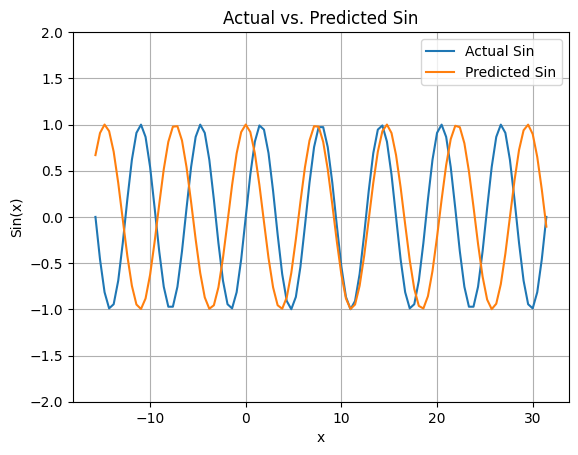

In [5]:
# Evaluate the trained circuit and generate plot
print("Evaluating the trained circuit...")
x_values = np.linspace(-5*np.pi, 10*np.pi, 100)
actual_sin = np.sin(x_values)
predicted_outputs = [circuit(params, x) for x in x_values]
plt.ylim(-2, 2)
plt.grid(True)
plt.plot(x_values, actual_sin, label="Actual Sin")
plt.plot(x_values, predicted_outputs, label="Predicted Sin")
plt.legend()
plt.xlabel("x")
plt.ylabel("Sin(x)")
plt.title("Actual vs. Predicted Sin")
plt.show()